1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

Standard Error of the Mean (SEM): 
Standard error represents the uncertainty of estimating the population mean from a sample. SEM=SD/√n

Standard Deviation (SD):
Standard deviation describes the degree of dispersion of individual data points around the mean in the original data set.
It reflects the overall variability of the data. The larger the standard deviation, the more dispersed the data distribution is and the greater the differences between individuals.

2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

When constructing a 95% confidence interval using the Standard Error, add or subtract approximately twice the standard error.

3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

To create a 95% bootstrapped confidence interval, repeatedly resample the data, calculate the means, and use the 2.5th and 97.5th percentiles of those resampled means as the interval bounds.

4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [1]:
import numpy as np

# Sample data (replace with your actual sample)
sample = np.array([2, 5, 7, 9, 10, 11, 15, 18, 20, 25])

# Number of bootstrap resamples
n_bootstrap = 1000

# Function to generate bootstrap resamples and calculate the sample statistic
def bootstrap_ci(data, statistic_func, n_resamples, ci=0.95):
    resamples = np.random.choice(data, size=(n_resamples, len(data)), replace=True)
    sample_statistics = np.array([statistic_func(resample) for resample in resamples])
    
    # Calculate the confidence interval
    lower_bound = np.percentile(sample_statistics, (1 - ci) / 2 * 100)
    upper_bound = np.percentile(sample_statistics, (1 + ci) / 2 * 100)
    return lower_bound, upper_bound

# Calculate 95% bootstrap confidence interval for the population mean
mean_ci = bootstrap_ci(sample, np.mean, n_bootstrap)
print(f"95% Bootstrap Confidence Interval for the Mean: {mean_ci}")

# To calculate for a different population parameter, such as the median:
# Replace np.mean with np.median in the function call
median_ci = bootstrap_ci(sample, np.median, n_bootstrap)
print(f"95% Bootstrap Confidence Interval for the Median: {median_ci}")


95% Bootstrap Confidence Interval for the Mean: (8.1, 16.7)
95% Bootstrap Confidence Interval for the Median: (7.0, 18.0)


5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

We need to distinguish between population parameters and sample statistics because the confidence interval is the range for inferring the population parameter based on the sample statistic.

6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

1)Bootstrapping is to create new virtual samples by repeatedly sampling the original sample to estimate the distribution of the statistic.

2)The main purpose of bootstrapping is to help us estimate the reliability of statistical results and construct confidence intervals.

3)We can compare the mean range of the bootstrapped sample with your hypothesized mean to determine whether the hypothesis is within a reasonable range.

7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

If the confidence interval includes zero, it means that there is not enough evidence to prove that the effect is different from zero, so you cannot reject the null hypothesis; if the confidence interval does not include zero, you can reject the null hypothesis.

8. Complete the following assignment.

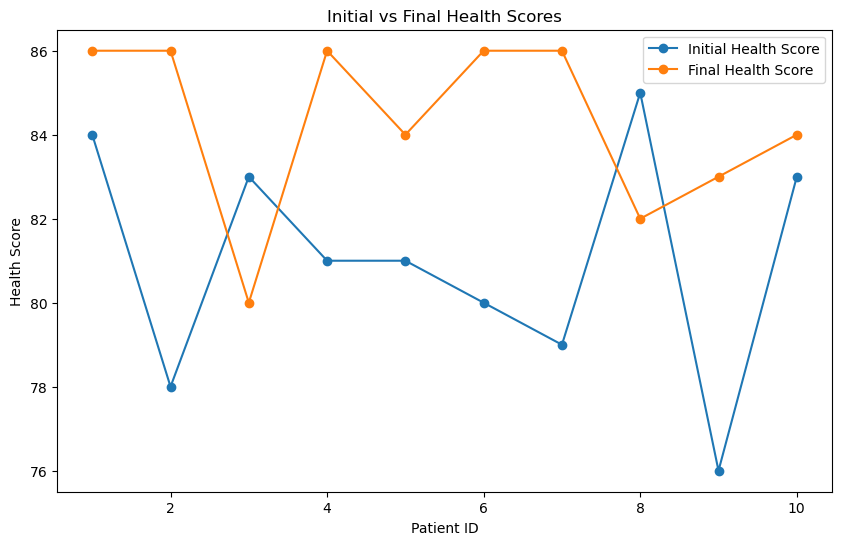

95% Confidence Interval for Health Score Change: (0.8, 5.5)
95% Confidence Interval for Health Score Median: (0.0, 7.0)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data based on the information provided
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Visualizing Initial and Final Health Scores
plt.figure(figsize=(10, 6))
plt.plot(df['PatientID'], df['InitialHealthScore'], label='Initial Health Score', marker='o')
plt.plot(df['PatientID'], df['FinalHealthScore'], label='Final Health Score', marker='o')
plt.title('Initial vs Final Health Scores')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.legend()

# Show the plot
plt.show()

# Alternatively, if running in an environment where plots don't display, save the plot
# plt.savefig('health_scores_plot.png')

# Calculating the health score change for each patient
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrap sampling function
def bootstrap_ci(data, n_bootstrap=1000, ci=95):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    lower_bound = np.percentile(means, (100 - ci) / 2)
    upper_bound = np.percentile(means, ci + (100 - ci) / 2)
    return lower_bound, upper_bound

# Extracting the health score changes
health_change = df['HealthScoreChange'].values

# Calculating 95% confidence interval for the mean of health score changes
ci_lower, ci_upper = bootstrap_ci(health_change)

print(f'95% Confidence Interval for Health Score Change: ({ci_lower}, {ci_upper})')

# Calculating 95% confidence interval for the median of health score changes
def bootstrap_ci_median(data, n_bootstrap=1000, ci=95):
    medians = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.median(sample))
    lower_bound = np.percentile(medians, (100 - ci) / 2)
    upper_bound = np.percentile(medians, ci + (100 - ci) / 2)
    return lower_bound, upper_bound

# Calculating 95% confidence interval for the median
ci_lower_median, ci_upper_median = bootstrap_ci_median(health_change)

print(f'95% Confidence Interval for Health Score Median: ({ci_lower_median}, {ci_upper_median})')


Problem introduction: Evaluate whether vaccines have a significant impact on health scores by analyzing the difference between initial and final health scores.

Null Hypothesis Interpretation: The null hypothesis is that the vaccine has no effect, meaning the change in health score should be close to zero.

Data visualization: Graph the initial and final health scores to show how each patient's health scores changed before and after vaccination.

Quantitative analysis: Use the bootstrap method to calculate the 95% confidence intervals of the mean and median changes in health scores to test the effect of the vaccine.

Findings and Discussion: Use the confidence interval to determine whether the change in health score is significant and decide whether to reject the null hypothesis.

Conclusion: If the confidence interval does not include zero, the vaccine is effective; otherwise, we cannot reject the hypothesis that the vaccine is not effective.

Further consideration: Vaccine effects could be further analyzed across gender and age groups, or the results could be validated using a larger data set.

9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes.

My chatbot told me it couldn’t generate a link, so I’ve pasted the link to the talk and the Google Doc of the talk summary below.
Link:https://docs.google.com/document/d/1BTkanLRQelsvs1Fic3hBpO-FZ_qguCBqHiDF243e-XE/edit